# Importing Libraries and Warnings

In [531]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# 1. Reading and Understading the data

In [532]:
lead = pd.read_csv("Leads.csv")

In [533]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [534]:
lead.shape

(9240, 37)

In [535]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [536]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# 2 Pre-Processing and Cleaning of Data

In [537]:
# Checking for Duplicates
lead.duplicated().sum()

0

In [538]:
# Converting 'Select' values to NaN as it means no option is selected
lead = lead.replace('Select', np.nan)

In [539]:
# Checking unique values 
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [540]:
# Dropping Lead Number and Prospect ID as they have all unique values
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [541]:
# Checking for the null values
lead.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

 Null values are present in data

In [542]:
# Checking for the Null Values Percentage
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

 Null Values needs to be handled

In [543]:
# dropping featues with more than 40% Missing values
column = lead.columns

for i in column:
    if((100*(lead[i].isnull().sum()/len(lead.index))) >= 40):
        lead.drop(i, 1, inplace = True)

In [544]:
# Rechecking of Null Values Percentage after Dropping Variable
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

 "City" missing values is 39.71% which comes out to be 40%. We can drop "City" as well.

In [545]:
# Dropping "City"
lead.drop("City",axis = 1,inplace = True)

In [546]:
# Checking values for Country
lead['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

1. Maximum Values are of India (about 70%), we can drop this column and no fun of imputing Nan Values with India as it it is Maximum Values are of India

In [547]:
# Dropping "Country"
lead.drop("Country",axis = 1,inplace = True)

In [548]:
# Rechecking the features after Dropping Feature
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [549]:
# Checking "Tags" Feature
lead['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [550]:
# Replacing Nan values with "Not Specified"
lead['Tags'] = lead['Tags'].replace(np.nan,'Not Specified')

In [551]:
lead['Tags'] = lead['Tags'].replace(["invalid number" , "Diploma holder (Not Eligible)", "wrong number given" ,"Not doing further education",
                                       "opp hangup", "number not provided","Lost to Others",  "University not recognized","Recognition issue (DEC approval)"], 'Negative Tags')

In [552]:
lead['Tags'] = lead['Tags'].replace(["Interested in Next batch","Shall take in the next coming month","Still Thinking","Interested Prospects","Want to take admission but has financial problems","In confusion whether part time or DLP","Lateral student"],"Positive Tags")

In [553]:
lead['Tags'].value_counts()

Not Specified                          3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Negative Tags                           408
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Interested  in full time MBA            117
Graduation in progress                  111
Positive Tags                            27
in touch with EINS                       12
Name: Tags, dtype: int64

In [554]:
# Rechecking the features 
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

In [555]:
# Checking "Specialization" Feature
lead['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [556]:
# Replacing Nan values with "Not Specified"
lead['Specialization'] = lead['Specialization'].replace(np.nan,'Not Specified')

#combining Management Specializations because they have similar trends

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management Specializations')  
lead['Specialization'].value_counts()

Management Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [557]:
# Checking "What is your current occupation" Feature
lead['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [558]:
# Replacing Nan values with "Not Specified"
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Not Specified')

In [559]:
# Checking "What matters most to you in choosing a course" Feature
lead['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [560]:
# We can drop What matters most to you in choosing a course variable as this is not giving much of information 
lead.drop("What matters most to you in choosing a course",axis = 1,inplace = True)

In [561]:
# Rechecking the features after Replacing and Imputations of NaN
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Tags                                        0.00
Update me on Supply 

In [562]:
# Checking "Lead Source" Feature
lead['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [563]:
# Replacing Nan Values and google with Google
lead['Lead Source'] = lead['Lead Source'].replace(np.nan,'Others')
lead['Lead Source'] = lead['Lead Source'].replace(["google"],'Google')
lead['Lead Source'] = lead['Lead Source'].replace(["Facebook"],'Social Media')
lead['Lead Source'] = lead['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'],'Others')

In [564]:
lead['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64

In [565]:
# Checking the percent of lose if the null values are removed in rows
round(100*(sum(lead.isnull().sum(axis=1) > 1)/lead.shape[0]),2)

1.48

In [566]:
# Drop all rows which have Nan Values. Since the number of Dropped rows is less than 1.50%, it will not affect the model
lead_df = lead[lead.isnull().sum(axis=1) <1]

In [567]:
# checking percentage of rows left 
round(100*(lead_df.shape[0])/(lead.shape[0]),2)

98.52

In [568]:
# Rececking For Missing Values or Nan Values Present in Data
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

No Null Vaues present in Data

In [569]:
lead_df.shape


(9103, 25)

# 3. EDA

In [570]:
# for getting all the categorical values


for column in lead_df:
    print(lead_df[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google              2873
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Others                48
Social Media          33
Live Chat              2
Name: Lead Source, dtype: int64
----------------------------------------------------------------------------------------
No     8379
Yes     724
Name: Do Not Email, dtype: int64
----------------------------------------------------------------------------------------
No     9101
Yes       2
Name: Do Not Call, dtype: int64
----------------------------------------------------------------------------------------
0    5642
1    3461
Name: Converted, dtype: int64
---------------------------------------

In [571]:
# Univariate Analysis for Categorial Variables

In [572]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9103 non-null   object 
 1   Lead Source                               9103 non-null   object 
 2   Do Not Email                              9103 non-null   object 
 3   Do Not Call                               9103 non-null   object 
 4   Converted                                 9103 non-null   int64  
 5   TotalVisits                               9103 non-null   float64
 6   Total Time Spent on Website               9103 non-null   int64  
 7   Page Views Per Visit                      9103 non-null   float64
 8   Last Activity                             9103 non-null   object 
 9   Specialization                            9103 non-null   object 
 10  What is your current occupation     

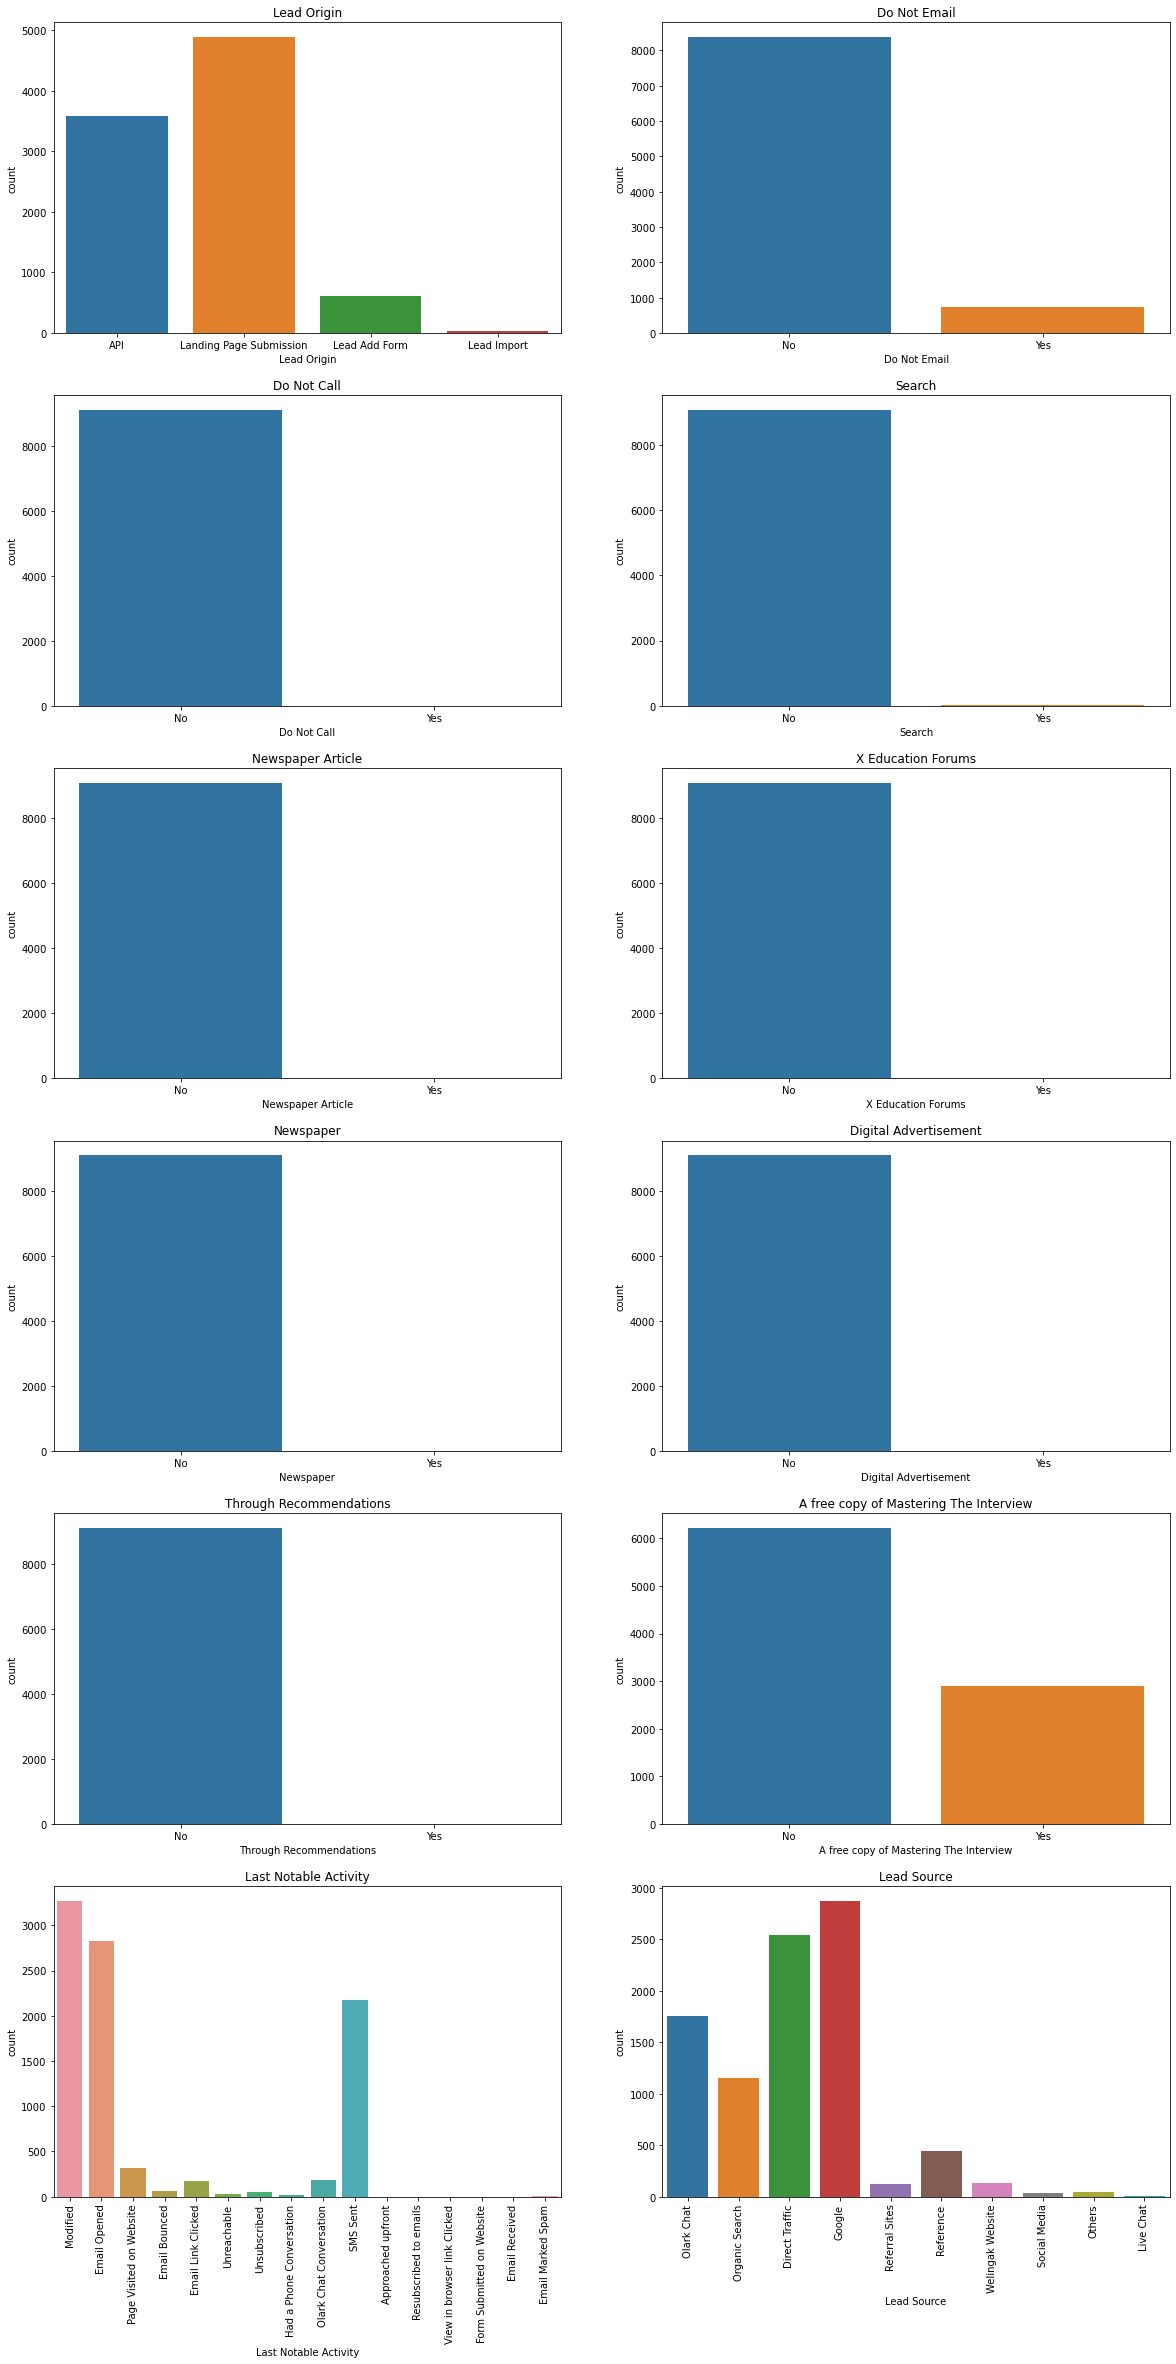

In [573]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(lead_df['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(lead_df['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(lead_df['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(lead_df['Search'])
plt.title('Search')

plt.subplot(6,2,5)
sns.countplot(lead_df['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,6)
sns.countplot(lead_df['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,7)
sns.countplot(lead_df['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,8)
sns.countplot(lead_df['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,9)
sns.countplot(lead_df['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,10)
sns.countplot(lead_df['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,11)
sns.countplot(lead_df['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(6,2,12)
sns.countplot(lead_df['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

### Inferences drawn:
1. Through Landing Page Submission followed by Api we can heavily identify the lead.
2. Most of the leads want the course details to be mailed.
3. Google is the most effective website to generate the leads.
4. Imbalance Data also present

1. Imbalanced Variables can be dropeed 
2. Checking Value Counts to check the Imbalance

In [574]:
lead_df['Do Not Call'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [575]:
# 'Do Not Call' feature can be dropped as 99% of data is No
drop_col = ["Do Not Call"]
drop_col

['Do Not Call']

In [576]:
lead_df['Search'].value_counts(normalize=True)

No     0.998462
Yes    0.001538
Name: Search, dtype: float64

In [577]:
# 'Search' feature can be dropped as 99% of data is No
drop_col.append('Search')
drop_col

['Do Not Call', 'Search']

In [578]:
lead_df['Newspaper Article'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [579]:
# 'Newspaper Article' feature can be dropped as 99% of data is No
drop_col.append('Newspaper Article')
drop_col

['Do Not Call', 'Search', 'Newspaper Article']

In [580]:
lead_df['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [581]:
# 'Magazine' feature can be dropped
drop_col.append('Magazine')
drop_col

['Do Not Call', 'Search', 'Newspaper Article', 'Magazine']

In [582]:
lead_df['X Education Forums'].value_counts(normalize=True)

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [583]:
# 'X Education Forums' feature can be dropped as 99% of data is No
drop_col.append('X Education Forums')
drop_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums']

In [584]:
lead_df['Newspaper'].value_counts(normalize=True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

In [585]:
# 'Newspaper' feature can be dropped as 99% of data is No
drop_col.append('Newspaper')
drop_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums',
 'Newspaper']

In [586]:
lead_df['Digital Advertisement'].value_counts(normalize=True)

No     0.999561
Yes    0.000439
Name: Digital Advertisement, dtype: float64

In [587]:
# 'Digital Advertisement' feature can be dropped as 99% of data is No
drop_col.append('Digital Advertisement')
drop_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement']

In [588]:
lead_df['Through Recommendations'].value_counts(normalize=True)

No     0.999231
Yes    0.000769
Name: Through Recommendations, dtype: float64

In [589]:
# 'Through Recommendations' feature can be dropped as 99% of data is No
drop_col.append('Through Recommendations')
drop_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations']

In [590]:
lead_df['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [591]:
# 'Update me on Supply Chain Content' feature can be dropped 
drop_col.append('Update me on Supply Chain Content')
drop_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Update me on Supply Chain Content']

In [592]:
lead_df['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [593]:
# 'I agree to pay the amount through cheque' feature can be dropped 
drop_col.append('I agree to pay the amount through cheque')
drop_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Update me on Supply Chain Content',
 'I agree to pay the amount through cheque']

In [594]:
lead_df['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [595]:
# ''Get updates on DM Content' feature can be dropped 
drop_col.append('Get updates on DM Content')
drop_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Update me on Supply Chain Content',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content']

In [596]:
lead_df['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [597]:
# 'Receive More Updates About Our Courses' feature can be dropped 
drop_col.append('Receive More Updates About Our Courses')
drop_col

['Do Not Call',
 'Search',
 'Newspaper Article',
 'Magazine',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Update me on Supply Chain Content',
 'I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Receive More Updates About Our Courses']

In [598]:
#dropping columns
lead_df = lead_df.drop(drop_col,1)
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Specialization                          9103 non-null   object 
 9   What is your current occupation         9103 non-null   object 
 10  Tags                                    9103 non-null   obje

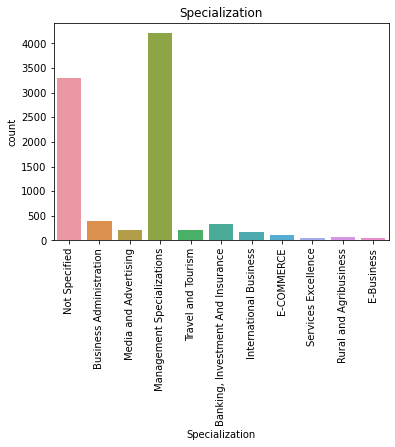

In [599]:
sns.countplot(lead_df['Specialization']).tick_params(axis='x',rotation=90)
plt.title('Specialization')

plt.show()

Inference drawn:
- Management Specialization have higher number of leads as well as leads converted.

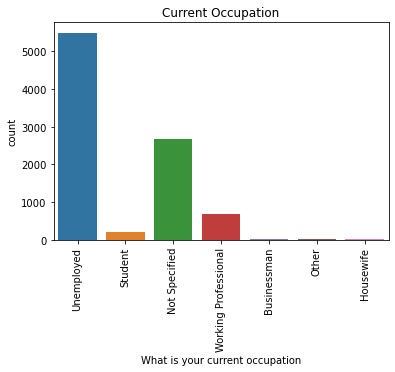

In [600]:
sns.countplot(lead_df['What is your current occupation']).tick_params(axis='x',rotation=90)
plt.title('Current Occupation')
plt.show()

### Inference drawn:
- Most of the leads are not working(unemployed)

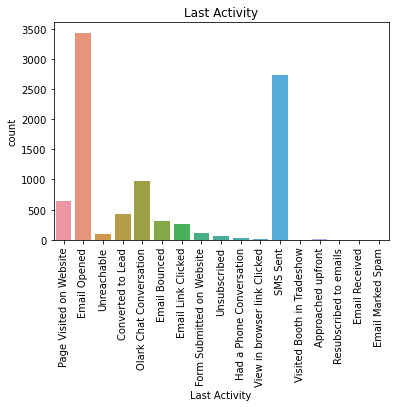

In [601]:
sns.countplot(lead_df['Last Activity']).tick_params(axis='x',rotation=90)
plt.title('Last Activity')
plt.show()

### Inference drawn:
- From the last activity we can see that emails are opened in respect to others.

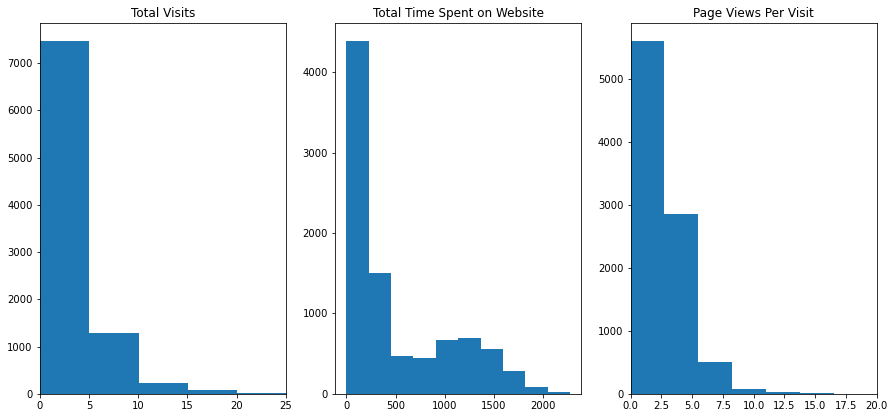

In [602]:
#Univariate Analysis for numerical variables

plt.figure(figsize = (15,15))

plt.subplot(2,3,1)
plt.hist(lead_df['TotalVisits'], bins = 50)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,3,2)
plt.hist(lead_df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,3,3)
plt.hist(lead_df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

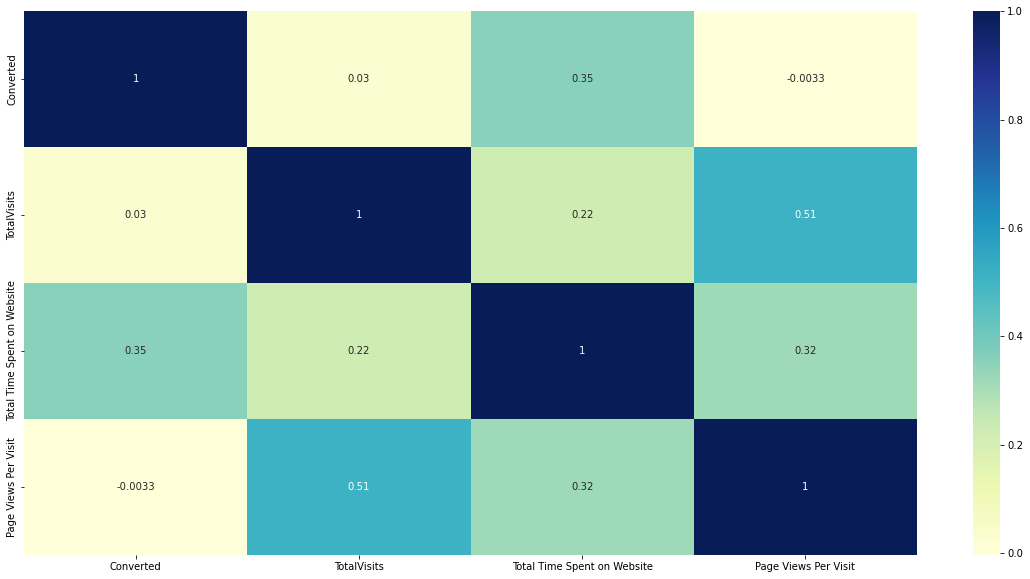

In [603]:
# Checking correlations of numeric values

plt.figure(figsize = (20, 10))  ## checking the correlations using heatmap
sns.heatmap(lead_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [604]:
# Checking for Outliers

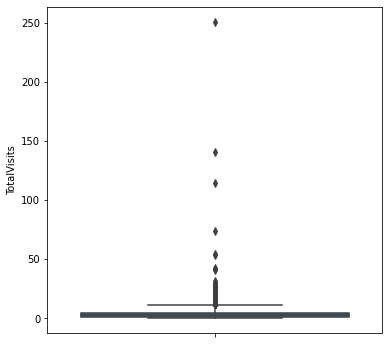

In [605]:
plt.figure(figsize=(6,6))
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

In [606]:
# Outliers are present in TotalVisits
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

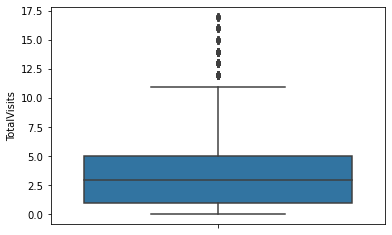

In [607]:
# Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]
Q1 = lead_df.TotalVisits.quantile(0.01)
lead_df = lead_df[(lead_df.TotalVisits >= Q1)]
sns.boxplot(y=lead_df['TotalVisits'])
plt.show()

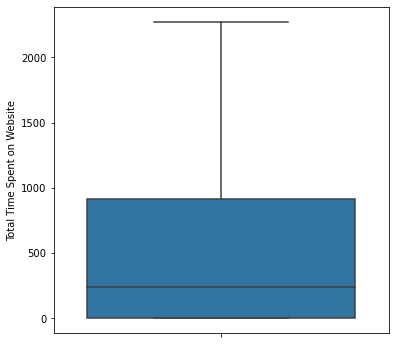

In [608]:
plt.figure(figsize=(6,6))
sns.boxplot(y=lead_df['Total Time Spent on Website'])
plt.show()

In [609]:
# No Outliers present in Total Time Spent on Website

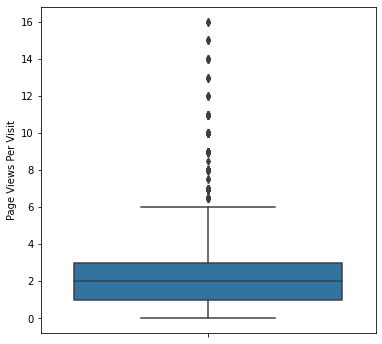

In [610]:
plt.figure(figsize=(6,6))
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

In [611]:
# Outliers present in Page per visit
#checking spread of "Page Views Per Visit"

lead_df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

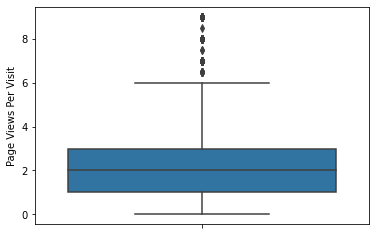

In [612]:
# Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df['Page Views Per Visit'] <= Q3]
Q1 = lead_df['Page Views Per Visit'].quantile(0.01)
leads = lead_df[lead_df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=lead_df['Page Views Per Visit'])
plt.show()

In [613]:
# Bivariate Analysis (with target variable: 'Converted') (Categorial Features)

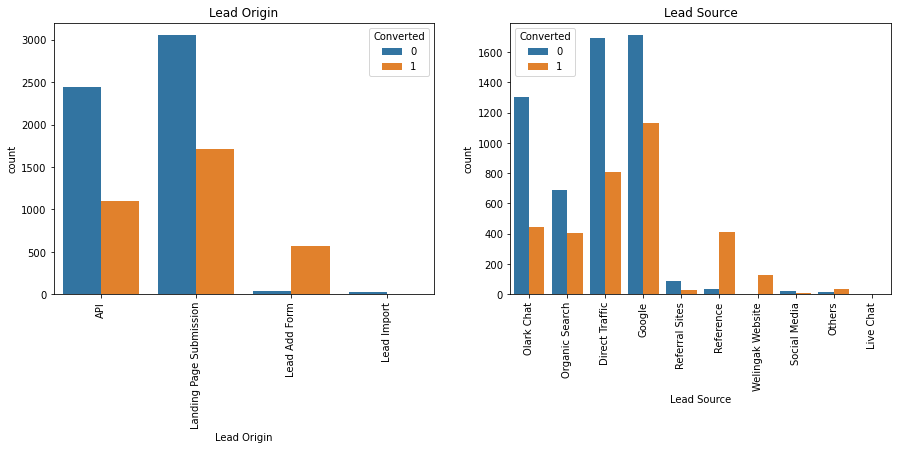

In [614]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

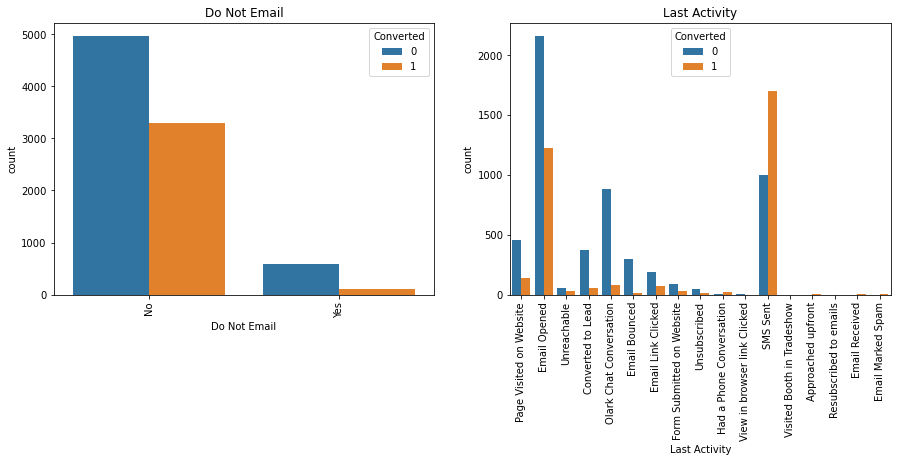

In [615]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Last Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

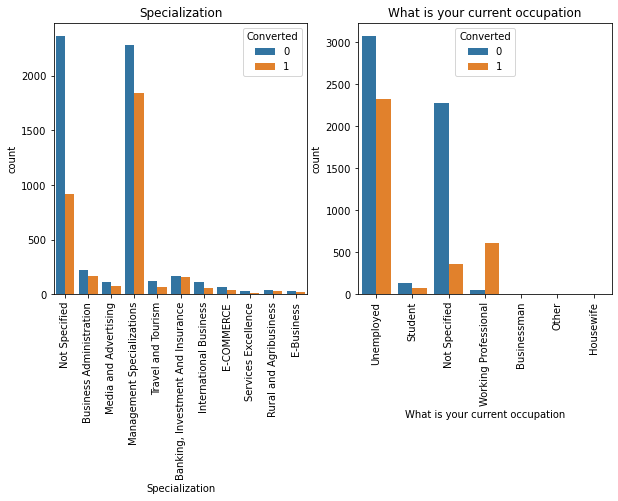

In [616]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

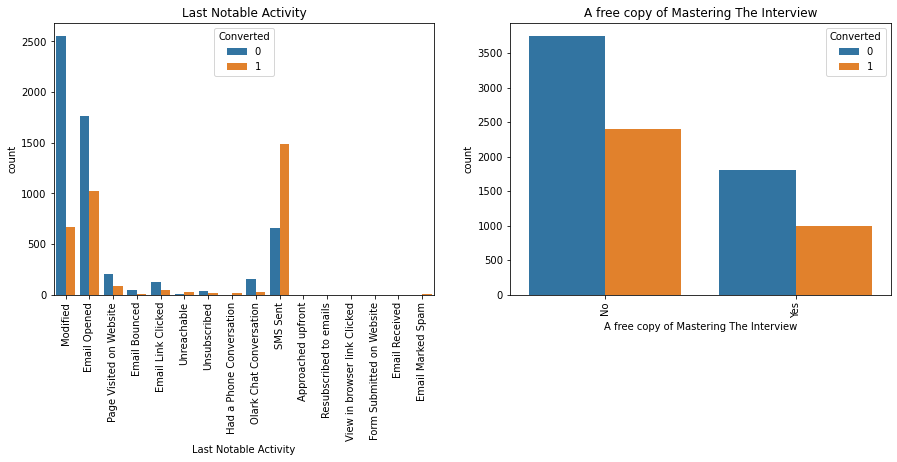

In [617]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_df).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

Infrences
1. Working Professionals have high chances of joining the course.
2. Maximum leads are generated through Google and Direct traffic.
3. Conversion Rate of reference leads and leads through welingak website is high.
4. API and Landing Page Submission bring higher number of leads as well as conversion.
5. Lead Add Form has a very high conversion rate but count of leads are not high.
6. Lead Import and Quick Add Form get very few leads.


In [618]:
# Bivariate Analysis (with target variable: 'Converted') (Numerical Features)

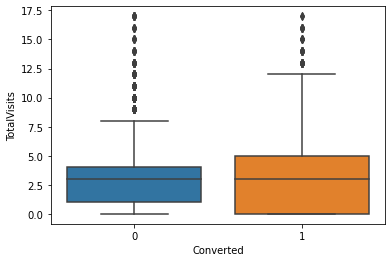

In [619]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

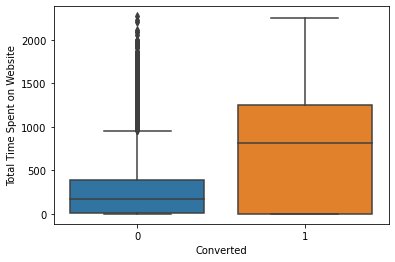

In [620]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead_df.Converted, y=lead_df['Total Time Spent on Website'])
plt.show()

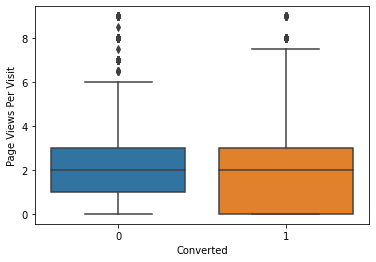

In [621]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=lead_df.Converted,y=lead_df['Page Views Per Visit'])
plt.show()

 Infrences
1. Median for converted and not-converted leads are same on Total Visits
2. Nothng conclusive on Total Visits
3. Leads spending more time on the website are likely to be converted.
4. Website should be made engaging to make leads spend more time.
5. Median for converted and unconverted leads are same on Page Views Per Visit.
6. Nothing Conclusive for lead conversion from Page Views Per Visit

# 4. Dummy Variables

In [622]:
col_cat = lead_df.select_dtypes(include= ['object']).columns
col_cat

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [623]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8953 non-null   object 
 1   Lead Source                             8953 non-null   object 
 2   Do Not Email                            8953 non-null   object 
 3   Converted                               8953 non-null   int64  
 4   TotalVisits                             8953 non-null   float64
 5   Total Time Spent on Website             8953 non-null   int64  
 6   Page Views Per Visit                    8953 non-null   float64
 7   Last Activity                           8953 non-null   object 
 8   Specialization                          8953 non-null   object 
 9   What is your current occupation         8953 non-null   object 
 10  Tags                                    8953 non-null   obje

In [624]:
# variables which is mapped
# List of variables to map

var_lst =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def bin_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead_df[var_lst] = lead_df[var_lst].apply(bin_map)


In [625]:
dummy01=pd.get_dummies(lead_df[['Lead Origin','What is your current occupation']],drop_first=True)
lead_df= pd.concat([lead_df,dummy01],1)

In [626]:
dummy01 = pd.get_dummies(lead_df['Specialization'], prefix  = 'Specialization')
dummy01 = dummy01.drop(['Specialization_Not Specified'], 1)
lead_df = pd.concat([lead_df, dummy01], axis = 1)

In [627]:
dummy01 = pd.get_dummies(lead_df['Lead Source'], prefix  = 'Lead Source')
dummy01 = dummy01.drop(['Lead Source_Others'], 1)
lead_df = pd.concat([lead_df, dummy01], axis = 1)

In [628]:
# grouping some categories from the column 'Last Activity' as it is not making any sort of difference.


lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

dummy01 = pd.get_dummies(lead_df['Last Activity'], prefix  = 'Last Activity')
dummy01 = dummy01.drop(['Last Activity_Others'], 1)
lead_df = pd.concat([lead_df, dummy01], axis = 1) 

In [629]:
#clubbing lower frequency values

lead_df['Last Notable Activity'] = lead_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [630]:
dummy01 = pd.get_dummies(lead_df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy01 = dummy01.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead_df = pd.concat([lead_df, dummy01], axis = 1)

dummy01 = pd.get_dummies(lead_df['Tags'], prefix  = 'Tags')
dummy01 = dummy01.drop(['Tags_Not Specified'], 1)
lead_df = pd.concat([lead_df, dummy01], axis = 1)

In [631]:
#dropping the original columns after dummy variable creation

lead_df.drop(col_cat,1,inplace = True)

In [632]:
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,...,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Negative Tags,Tags_Positive Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# 5.Train-test-Split

In [633]:
# Putting response variable to y and rest of the variables are present in X
y = lead_df['Converted']
y.head()
X=lead_df.drop('Converted', axis=1)

In [634]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100,stratify = y)

In [635]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 2389 to 1113
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_Landing Page Submission                   6267 non-null   uint8  
 4   Lead Origin_Lead Add Form                             6267 non-null   uint8  
 5   Lead Origin_Lead Import                               6267 non-null   uint8  
 6   What is your current occupation_Housewife             6267 non-null   uint8  
 7   What is your current occupation_Not Specified         6267 non-null   uint8  
 8   What is your current occupation_Other                 6

# 6.Scaling of the Data

In [636]:
scale = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scale.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Negative Tags,Tags_Positive Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off
2389,0.176471,0.599472,0.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7435,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1102,0.117647,0.767606,0.222222,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4444,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8026,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [637]:
lr = LogisticRegression()

In [638]:
 # running RFE with 15 variables as output
rfe1 = RFE(lr, 15)             
rfe1 = rfe1.fit(X_train, y_train)

In [639]:
rfe1.support_

array([False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True, False,  True])

In [640]:
list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('TotalVisits', False, 6),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 30),
 ('Lead Origin_Lead Add Form', False, 2),
 ('Lead Origin_Lead Import', False, 32),
 ('What is your current occupation_Housewife', False, 18),
 ('What is your current occupation_Not Specified', True, 1),
 ('What is your current occupation_Other', False, 36),
 ('What is your current occupation_Student', False, 43),
 ('What is your current occupation_Unemployed', False, 16),
 ('What is your current occupation_Working Professional', False, 15),
 ('Specialization_Banking, Investment And Insurance', False, 33),
 ('Specialization_Business Administration', False, 34),
 ('Specialization_E-Business', False, 40),
 ('Specialization_E-COMMERCE', False, 22),
 ('Specialization_International Business', False, 20),
 ('Specialization_Management Specializations', False, 41),
 ('Specialization_Media and Advertising', False, 35),
 ('Specialization_

In [641]:
# RFE supported columns list
column = X_train.columns[rfe1.support_]
column

Index(['Total Time Spent on Website',
       'What is your current occupation_Not Specified',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Negative Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off'],
      dtype='object')

# 7. Logistic regression Model Building 

In [642]:
# Model 1

X_train_sm = sm.add_constant(X_train[column])
lm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = lm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1128.5
Date:                Mon, 17 Oct 2022   Deviance:                       2256.9
Time:                        02:42:47   Pearson chi2:                 7.88e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5790      0.120     -4.813      0.000      -0.815      -0.343
Total Time Spent on Website                       3.5004      0.233     14.992      0.000       3.043       3.958
What is your current occupation_Not Specified    -2.2634      0.137    -16.539      0.000      -2.532      -1.995
Lead Source_Welingak Website                      3.3719      0.742      4.544      0.000       1.917       4.826
Last Activity_SMS Sent                            1.9084      0.124     15.368      0.000       1.665       2.152
Last Notable Activity_Modified                   -1.6194      0.132    -12.289      0.000      -1.878      -1.361
Tags_Already a student                           -4.5875      0.598     -7.670      0.000      -5.760      -3.415
Tags_Closed by Horizzon                           6.3031      1.016      6.204      0.000       4.312       8.294
Tags_Graduation in progress                      -2.0870      0.497     -4.199      0.000      -3.061      -1.113
Tags_Interested  in full time MBA                -3.4197      0.744     -4.593      0.000      -4.879      -1.961
Tags_Interested in other courses                 -3.1550      0.365     -8.642      0.000      -3.871      -2.440
Tags_Lost to EINS                                 5.1713      0.551      9.392      0.000       4.092       6.250
Tags_Negative Tags                               -4.6185      0.491     -9.413      0.000      -5.580      -3.657
Tags_Ringing                                     -4.9072      0.261    -18.782      0.000      -5.419      -4.395
Tags_Will revert after reading the email          2.9778      0.189     15.788      0.000       2.608       3.347
Tags_switched off                                -5.3617      0.607     -8.834      0.000      -6.551      -4.172
=================================================================================================================
"""

 All the p-values are 0.00 further checking Variance Inflation Factor(VIF) to see if any correlation are there between the variables

In [643]:
# Creating a dataframe that will show all the features with their VIFs
VIF = pd.DataFrame()
VIF['Features'] = X_train[column].columns
VIF['VIF'] = [variance_inflation_factor(X_train[column].values, i) for i in range(X_train[column].shape[1])]
VIF['VIF'] = round(VIF['VIF'], 2)
VIF = VIF.sort_values(by = "VIF", ascending = False)
VIF

,Features,VIF
0,Total Time Spent on Website,1.82
4,Last Notable Activity_Modified,1.81
13,Tags_Will revert after reading the email,1.66
3,Last Activity_SMS Sent,1.54
1,What is your current occupation_Not Specified,1.50
9,Tags_Interested in other courses,1.17
12,Tags_Ringing,1.17
6,Tags_Closed by Horizzon,1.10
5,Tags_Already a student,1.08
11,Tags_Negative Tags,1.08


VIF values seems perfect as well as p values. We can use this MODEL 

# 8.Making Predictions

In [644]:
# Predicting values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred[:15]

2389    0.820453
7435    0.790742
1102    0.212203
4444    0.996744
8026    0.011410
2163    0.990999
5814    0.037674
850     0.039751
2758    0.011410
8947    0.013613
3163    0.987947
1819    0.996349
3631    0.997711
6446    0.035555
8256    0.011410
dtype: float64

In [645]:
# Reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:15]

array([0.82045347, 0.79074166, 0.21220287, 0.9967445 , 0.01141019,
       0.99099871, 0.03767412, 0.03975102, 0.01141019, 0.01361257,
       0.98794664, 0.99634876, 0.9977111 , 0.03555521, 0.01141019])

In [646]:
# Data frame with convertion rate and probablity of predicted ones
y_train_pred_f = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_f['Prospect ID'] = y_train.index
y_train_pred_f.head()

,Converted,Converted_prob,Prospect ID
0,1,0.820453,2389
1,1,0.790742,7435
2,1,0.212203,1102
3,1,0.996744,4444
4,0,0.011410,8026


In [647]:
# Substituting
y_train_pred_f['Predicted'] = y_train_pred_f.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_f.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.820453,2389,1
1,1,0.790742,7435,1
2,1,0.212203,1102,0
3,1,0.996744,4444,1
4,0,0.011410,8026,0


In [648]:
# Confusion Metrics 
con_met = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f.Predicted )
print(con_met)

[[3746  145]
 [ 263 2113]]


In [649]:
# Substituting the value of True Positive
TP = con_met[1,1]
# Substituting the value of True Negatives
TN = con_met[0,0]
# Substituting the value of False Positives
FP = con_met[0,1] 
# Substituting the value of false negatives
FN = con_met[1,0]

In [650]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.9348970799425562

In [651]:
# Sensitivity
TP/(TP+FN)

0.8893097643097643

In [652]:
# Specificity
TN / float(TN+FP)

0.9627345155487022

In [653]:
# Precession
TP/(TP+FP)

0.9357838795394154

With cutoff 0.5 we have
1. accuracy = 93.48%
2. Senstivity = 88.93%
3. Specificity = 96.27%
4. Precession = 93.57%

We found out that specificity is 96.27% which is good and Senstivity is 88.93% which needs to be handled

# 9. ROC

In [654]:
def roc_def( actuals, prob ):
    Fpr, Tpr, Threshold = metrics.roc_curve( actuals, prob,drop_intermediate = False )
    score_auc = metrics.roc_auc_score( actuals, prob )
    plt.figure(figsize=(8, 8))
    plt.plot( Fpr, Tpr, label='ROC curve (area = %0.2f)' % score_auc )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver characteristic example')
    plt.legend(loc="upper left")
    plt.show()
    return None

In [655]:
Fpr, Tpr, Threshold = metrics.roc_curve( y_train_pred_f.Converted, y_train_pred_f.Converted_prob, drop_intermediate = False )

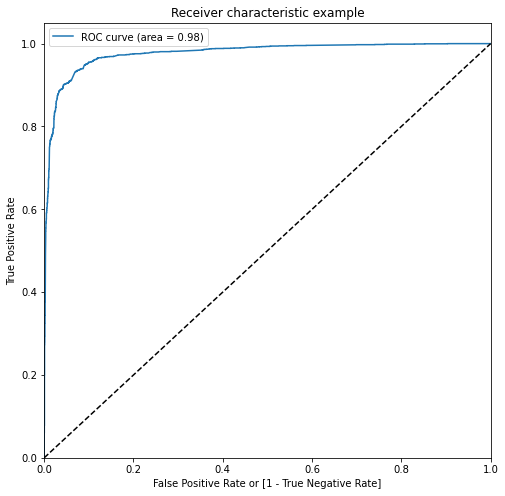

In [656]:
roc_def(y_train_pred_f.Converted, y_train_pred_f.Converted_prob)

ROC should be closer to 1 and we are Getting ROC = 0.98 which is very good value which indicates that it is a great model

# 10. Probability Cut-Offs

In [657]:
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_f[i]= y_train_pred_f.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_f.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.820453,2389,1,1,1,1,1,1,1,1,1,1,0
1,1,0.790742,7435,1,1,1,1,1,1,1,1,1,0,0
2,1,0.212203,1102,0,1,1,1,0,0,0,0,0,0,0
3,1,0.996744,4444,1,1,1,1,1,1,1,1,1,1,1
4,0,0.011410,8026,0,1,0,0,0,0,0,0,0,0,0


In [658]:
# Calculating Accuracy Sensitivity and Specificity for various Probability Cutoffs.
cutoff = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
num_01 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num_01:
    cm_1 = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f[i] )
    total_1=sum(sum(cm_1))
    accuracy = (cm_1[0,0]+cm_1[1,1])/total_1
    specificity = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
    sensitivity = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
    cutoff.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.379129     1.000000     0.000000
0.1          0.1  0.890538     0.969697     0.842200
0.2          0.2  0.919260     0.955387     0.897199
0.3          0.3  0.926440     0.938552     0.919044
0.4          0.4  0.931067     0.905303     0.946800
0.5          0.5  0.934897     0.889310     0.962735
0.6          0.6  0.934738     0.879630     0.968389
0.7          0.7  0.928036     0.853535     0.973529
0.8          0.8  0.909686     0.795034     0.979697
0.9          0.9  0.898835     0.753367     0.987664


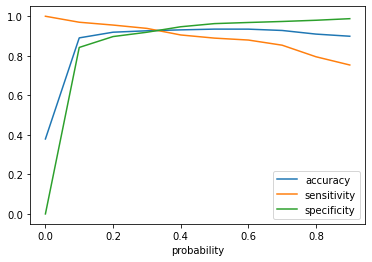

In [659]:
# Plotting accuracy sensitivity and specificity for various probabilities

cutoff.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

The optimal cutoff is at 0.35

In [660]:
y_train_pred_f['Predicted_F'] = y_train_pred_f.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_f.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted_F
0,1,0.820453,2389,1,1,1,1,1,1,1,1,1,1,0,1
1,1,0.790742,7435,1,1,1,1,1,1,1,1,1,0,0,1
2,1,0.212203,1102,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.996744,4444,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.011410,8026,0,1,0,0,0,0,0,0,0,0,0,0


In [661]:
y_train_pred_f['Score_Lead'] = y_train_pred_f.Converted_prob.map( lambda x: round(x*100))

y_train_pred_f[['Converted','Converted_prob','Prospect ID','Predicted_F','Score_Lead']].head()

,Converted,Converted_prob,Prospect ID,Predicted_F,Score_Lead
0,1,0.820453,2389,1,82
1,1,0.790742,7435,1,79
2,1,0.212203,1102,0,21
3,1,0.996744,4444,1,100
4,0,0.011410,8026,0,1


In [662]:
con_metrics = metrics.confusion_matrix(y_train_pred_f.Converted, y_train_pred_f.Predicted_F)
con_metrics

array([[3615,  276],
       [ 162, 2214]], dtype=int64)

In [663]:
TP = con_metrics[1,1] # true positive 
TN = con_metrics[0,0] # true negatives
FP = con_metrics[0,1] # false positives
FN = con_metrics[1,0] # false negatives

In [664]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.9301101005265677

In [665]:
# Sensitivity/Recall
TP/(TP+FN)

0.9318181818181818

In [666]:
# Specificity
TN / float(TN+FP)

0.9290670778720124

In [667]:
# Precession
TP/(TP+FP)

0.8891566265060241

With cutoff 0.35 on Train Data
1. Accuracy = 93.01%
2. Senstivity/Recall = 93.18%
3. Specificity = 92.90%
4. Precession = 88.91%

We concluded that the optimal cut-off for the model is around 0.35 and chose this value to be threshold and got decent values of all the metrics – Accuracy (93.01%), Sensitivity (93.18%), and Specificity (92.90%).

In [668]:
y_train_pred_f.Converted, y_train_pred_f.Predicted_F
precession, recall, thresholds = precision_recall_curve(y_train_pred_f.Converted, y_train_pred_f.Converted_prob)

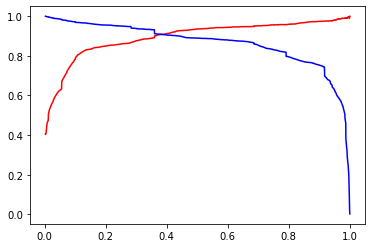

In [669]:
plt.plot(thresholds, precession[:-1], "r-")
plt.plot(thresholds, recall[:-1], "b-")
plt.show()

Plotted a trade-off curve between precision and recall.

# 11. Scaling Test Set

In [670]:
scale = MinMaxScaler()
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scale.fit_transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Not Specified,What is your current occupation_Other,What is your current occupation_Student,...,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Negative Tags,Tags_Positive Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off
9078,0.176471,0.047576,0.333333,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7931,0.117647,0.816493,0.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4624,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
176,0.117647,0.173539,0.222222,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5080,0.176471,0.611690,0.333333,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [671]:
X_test = X_test[column]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Not Specified,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Tags_Already a student,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Negative Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off
9078,0.047576,1,0,0,1,0,0,0,0,0,0,0,0,0,0
7931,0.816493,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4624,0.000000,0,0,1,0,0,0,0,0,0,0,0,0,1,0
176,0.173539,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5080,0.611690,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [672]:
X_test_f = sm.add_constant(X_test)

# 12. Prediction on Test Set

In [673]:
y_test_pred_f = result.predict(X_test_f)

In [674]:
y_test_pred_f[:15]

9078    0.013450
7931    0.999228
4624    0.986707
176     0.096655
5080    0.826668
3480    0.055075
6941    0.026089
3620    0.011410
1042    0.011410
9124    0.106071
8404    0.456085
5215    0.001216
4410    0.022773
8212    0.017567
719     0.006875
dtype: float64

In [675]:
# Converting into Arrays
y_pred_f = pd.DataFrame(y_test_pred_f)
y_pred_f.head()

,0
9078,0.013450
7931,0.999228
4624,0.986707
176,0.096655
5080,0.826668


In [676]:
# Converting y_test to dataframe
df_y_test = pd.DataFrame(y_test)

In [677]:
# Putting CustID to index
df_y_test['Prospect ID'] = df_y_test.index

In [678]:
# Removing index for both dataframes to append them 
y_pred_f.reset_index(drop=True, inplace=True)
df_y_test.reset_index(drop=True, inplace=True)

In [679]:
# Appending df_y_test and y_pred_f
y_pred_f = pd.concat([df_y_test, y_pred_f],axis=1)
y_pred_f.head()

,Converted,Prospect ID,0
0,0,9078,0.013450
1,1,7931,0.999228
2,1,4624,0.986707
3,0,176,0.096655
4,1,5080,0.826668


In [680]:
# Renaming the column 
y_pred_f= y_pred_f.rename(columns={ 0 : 'Converted_prob'})
y_pred_f.head()

,Converted,Prospect ID,Converted_prob
0,0,9078,0.013450
1,1,7931,0.999228
2,1,4624,0.986707
3,0,176,0.096655
4,1,5080,0.826668


In [681]:
# Rearranging the columns
y_pred_f = y_pred_f[['Prospect ID','Converted','Converted_prob']]
y_pred_f['Score_Lead'] = y_pred_f.Converted_prob.map( lambda x: round(x*100))
y_pred_f.head()

,Prospect ID,Converted,Converted_prob,Score_Lead
0,9078,0,0.013450,1
1,7931,1,0.999228,100
2,4624,1,0.986707,99
3,176,0,0.096655,10
4,5080,1,0.826668,83


In [682]:
y_pred_f['Predicted_F'] = y_pred_f.Converted_prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_f.head()

,Prospect ID,Converted,Converted_prob,Score_Lead,Predicted_F
0,9078,0,0.013450,1,0
1,7931,1,0.999228,100,1
2,4624,1,0.986707,99,1
3,176,0,0.096655,10,0
4,5080,1,0.826668,83,1


In [683]:
con_metrics = metrics.confusion_matrix(y_pred_f.Converted, y_pred_f.Predicted_F )
con_metrics

array([[1554,  113],
       [  70,  949]], dtype=int64)

In [684]:
TP = con_metrics[1,1] # true positive 
TN = con_metrics[0,0] # true negatives
FP = con_metrics[0,1] # false positives
FN = con_metrics[1,0] # false negatives

In [685]:
# Accuracy
(TP+TN)/(TP+TN+FP+FN)

0.9318689501116902

In [686]:
# Sensitivity/Recall
TP/(TP+FN)

0.9313052011776252

In [687]:
# Specificity
TN / float(TN+FP)

0.9322135572885423

In [688]:
# Precession
TP/(TP+FP)

0.8935969868173258

After Running Model on Test data at cutoff 0.35
1. Accuracy = 93.18%
2. Senstivity/Recall = 93.13%
3. Specificity = 93.22%
4. Precession = 89.35%

Comparing Train and Test Data with cutoff 0.35

a. Train Data
1. Accuracy = 93.01%
2. Senstivity/Recall = 93.18%
3. Specificity = 92.90%
4. Precession = 88.91%

b. Test Data
1. Accuracy = 93.18%
2. Senstivity/Recall = 93.13%
3. Specificity = 93.22%
4. Precession = 89.35%

It seems that Model will predict the Conversion Rate very well 

# Conclusion

It seems that Model will predict the Conversion Rate very well and X Education have a high chance of getting all the potential buyers to buy their courses by focussing on: 
1.	The customers are visiting the website more often/ is eager to know about the course by visiting the website several times and downloading the program sheet.
2.	Whose last modified activity falls under the category ‘Modified’.
3.	The customers who have opened the Email to have a look over the program.